In [1]:
##import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from scipy.stats import pointbiserialr
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv ("Desktop/Desktop/My self development journey/Machine learning course/Projects/Linear regression/Telco consumer churn data set/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
##check missing vlaues
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df ["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [10]:
df ["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [11]:
df ["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
df ["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
## count occurrences of each gender
gender_counts = df["gender"].value_counts()

#extract labels and sizes for pie charts
labels = gender_counts.index
sizes = gender_counts.values 

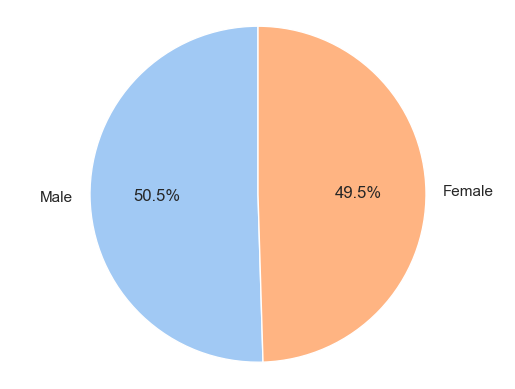

In [14]:
##Create pie charts for gender using gender counts
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

#Equal aspect ratio ensuring everything is drawn in a pie chart
plt.axis('equal')

plt.show()

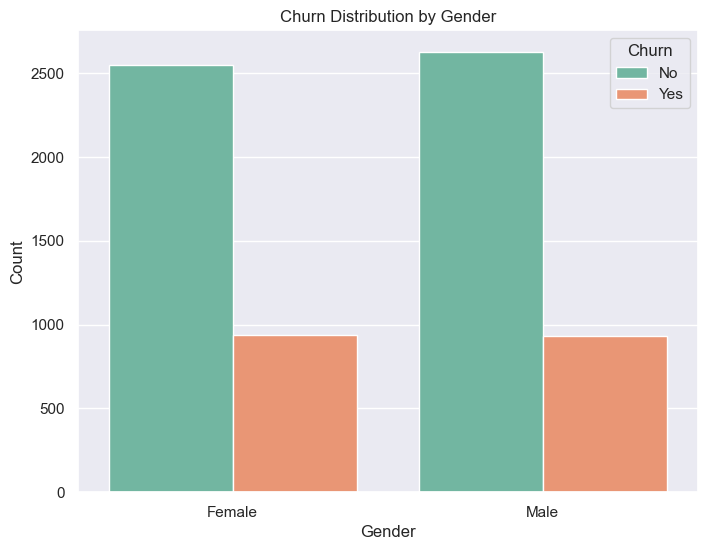

In [15]:
## Gender in relation to Churn using bar charts
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender')
plt.show()

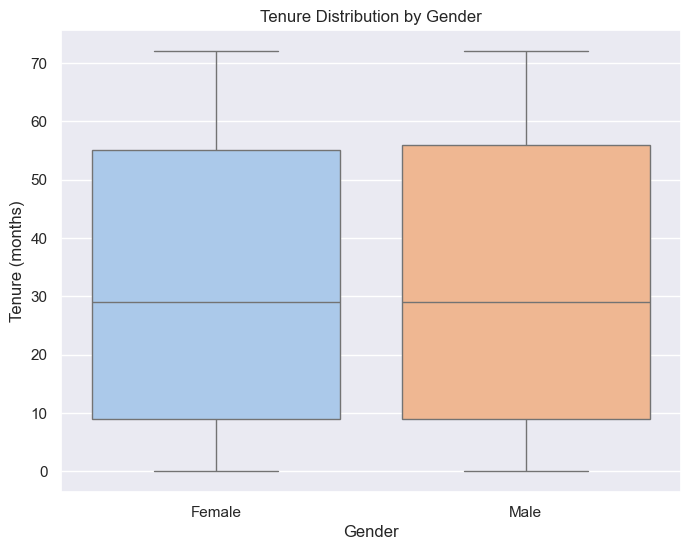

In [16]:
##Tenure in relation to gender - observing which geneder stayed the longest 
## Ploting Box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='tenure', data=df, hue='gender', palette='pastel', dodge=False, legend=False)
plt.xlabel('Gender')
plt.ylabel('Tenure (months)')
plt.title('Tenure Distribution by Gender')

plt.show()

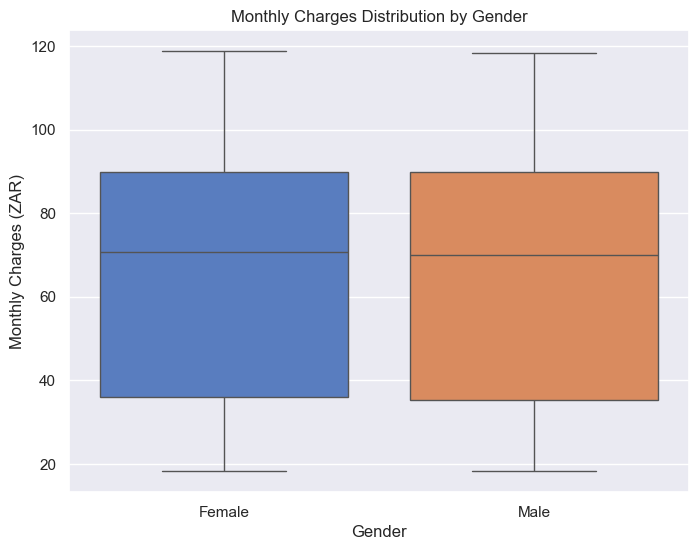

In [17]:
##ploting gender in relation to momthly charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='MonthlyCharges', data=df, hue='gender', palette='muted', dodge=False, legend=False)
plt.xlabel('Gender')
plt.ylabel('Monthly Charges (ZAR)')
plt.title('Monthly Charges Distribution by Gender')
plt.show()

In [18]:
SeniorCitizen_counts = df["SeniorCitizen"].value_counts()
labels = ["Non-senior", "Senior"]
sizes = SeniorCitizen_counts.values

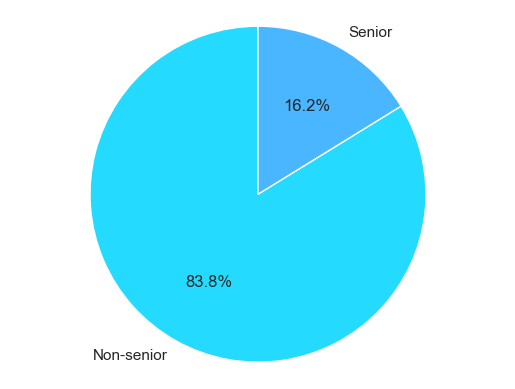

In [19]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('cool'))
plt.axis('equal')
plt.show()

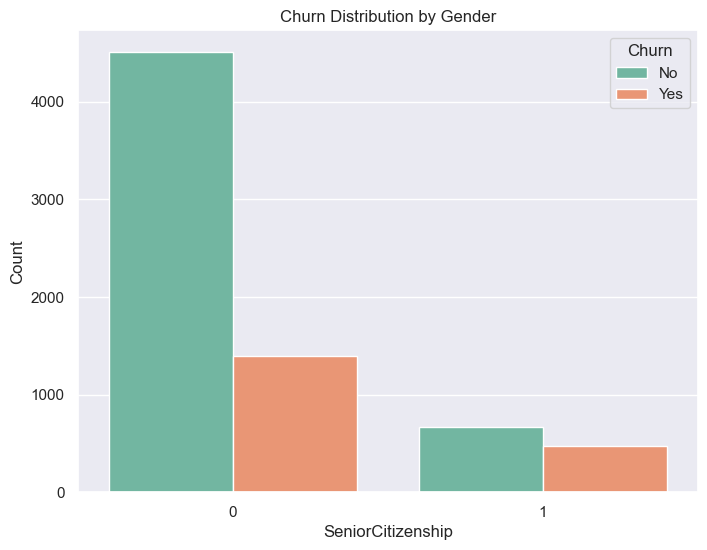

In [20]:
## Impact of Senior citizenship on Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2')
plt.xlabel('SeniorCitizenship')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender')
plt.show()

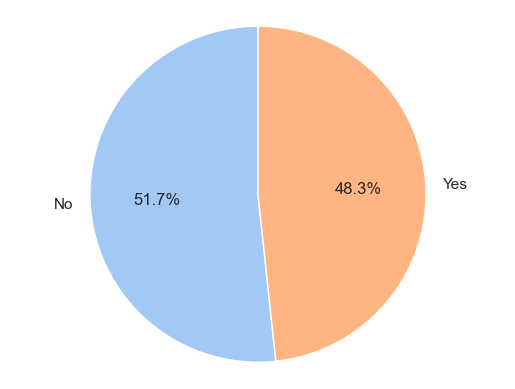

In [21]:
## count occurrences of People with partners vs without partners
Partner_counts = df["Partner"].value_counts()

#extract labels and sizes for pie charts
labels = Partner_counts.index
sizes = Partner_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.show()


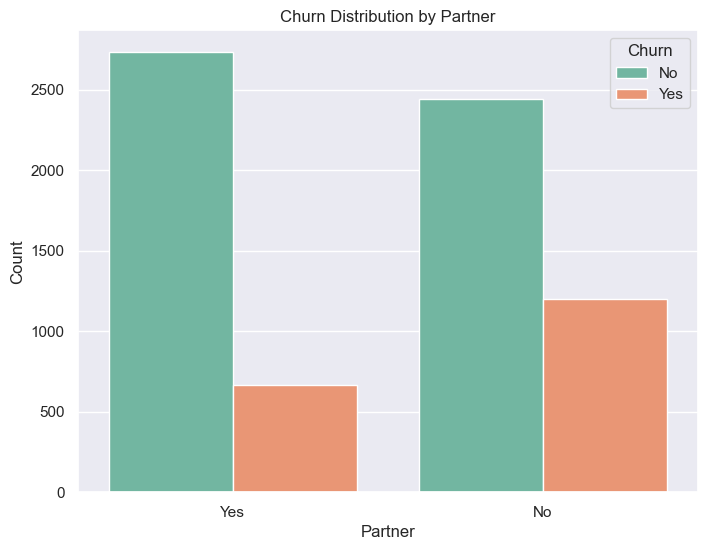

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=df, palette='Set2')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Churn Distribution by Partner')
plt.show()

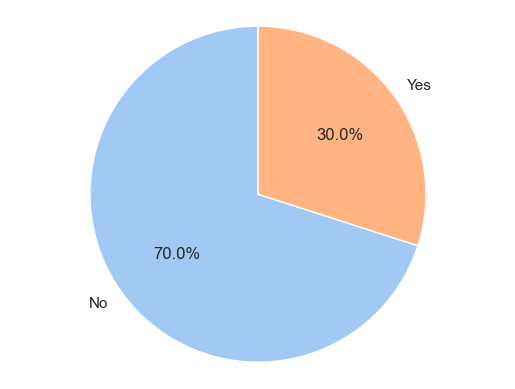

In [23]:
## count occurrences of those with Dependents and those without dependents 
Dependents_counts = df["Dependents"].value_counts()

#extract labels and sizes for pie charts
labels = Dependents_counts.index
sizes = Dependents_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.show()

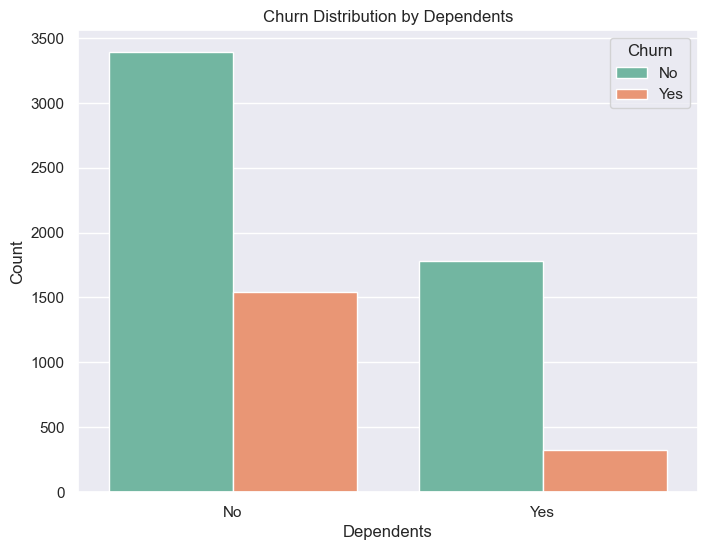

In [24]:
##Bar charts to show impact of having dependents on Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='Set2')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.title('Churn Distribution by Dependents')
plt.show()

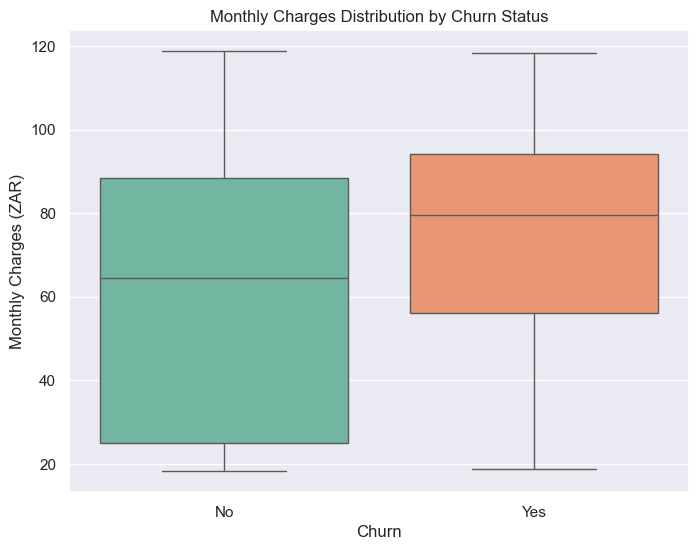

In [25]:
##ploting monthly charges in relation to churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2', dodge=False, legend=False)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges (ZAR)')
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

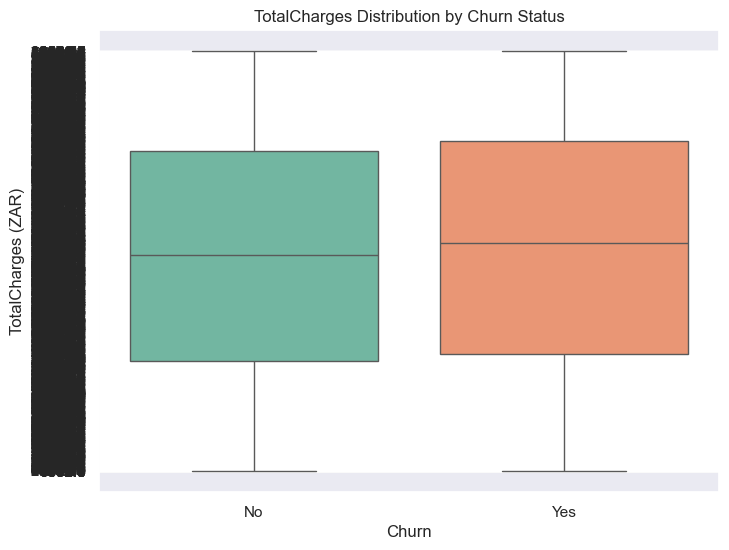

In [26]:
##ploting Total charges in relation to churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Set2', dodge=False, legend=False)
plt.xlabel('Churn')
plt.ylabel('TotalCharges (ZAR)')
plt.title('TotalCharges Distribution by Churn Status')
plt.show()

Text(0.5, 1.0, 'Tenure Distribution by Churn')

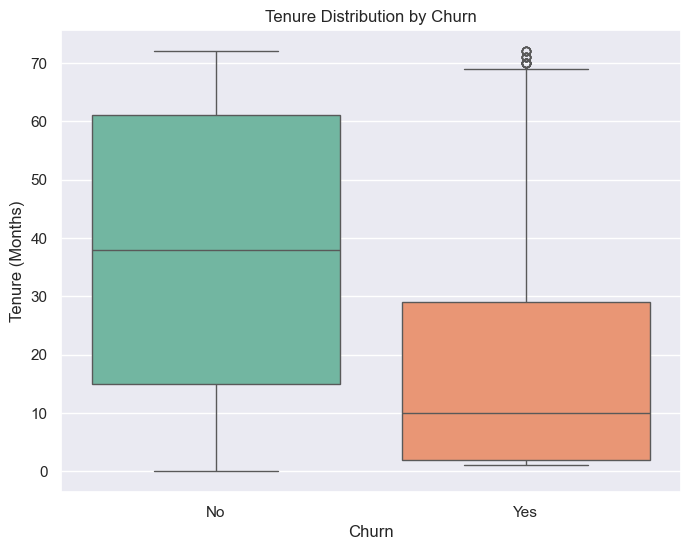

In [27]:
## Churn in relation to Tenure 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df, hue='Churn', palette='Set2', dodge=False, legend=False)
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.title('Tenure Distribution by Churn')


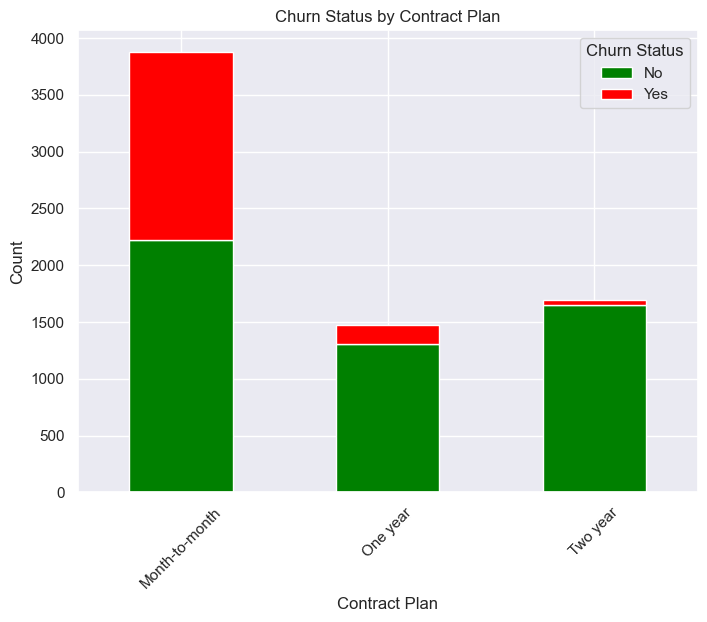

In [28]:
###Show different contract plans in relation to churn, using stacked bar chart
## creating a croass tabulation of Churn by contract plan
Contract_Churn = pd.crosstab(df['Contract'], df['Churn'])

## Plotting stacked bar chart
ax = Contract_Churn.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.xlabel('Contract Plan')
plt.ylabel('Count')
plt.title('Churn Status by Contract Plan')
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

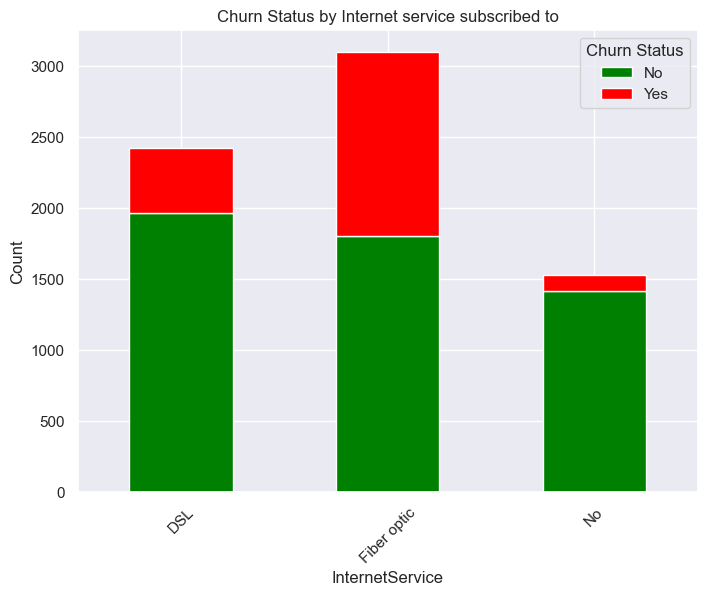

In [29]:
##Impact of having internet service on Churn
## creating a cross tabulation of Churn by internet service subscribed to
InternetService_Churn = pd.crosstab(df['InternetService'], df['Churn'])

## Plotting stacked bar chart
ax = InternetService_Churn.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.title('Churn Status by Internet service subscribed to')
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

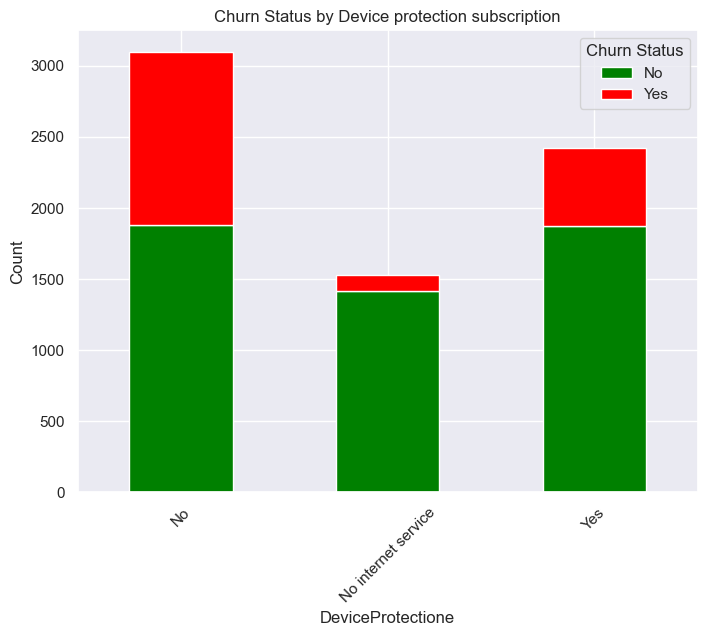

In [30]:
## impact of subscription to device protection on Churn
## creating a cross tabulation of Churn by device protection subscribstion 
DeviceProtection_Churn = pd.crosstab(df['DeviceProtection'], df['Churn'])

## Plotting stacked bar chart
ax = DeviceProtection_Churn.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.xlabel('DeviceProtectione')
plt.ylabel('Count')
plt.title('Churn Status by Device protection subscription')
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

In [31]:
df ["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

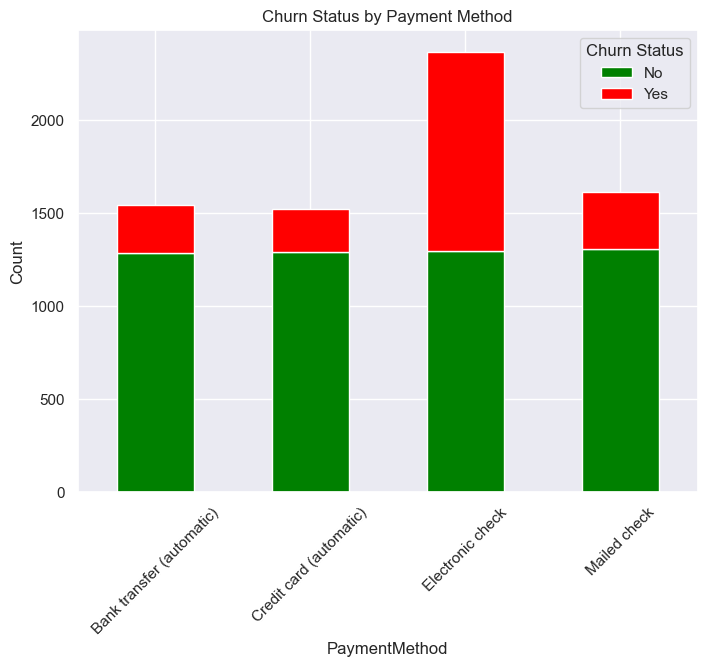

In [32]:
## impact of payment method on Churn
## creating a cross tabulation of Churn by payment method
PaymentMethod_Churn = pd.crosstab(df['PaymentMethod'], df['Churn'])

## Plotting stacked bar chart
ax = PaymentMethod_Churn.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.xlabel('PaymentMethod')
plt.ylabel('Count')
plt.title('Churn Status by Payment Method')
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

In [33]:
## double checking data types - got an error when doing the point biserial correlation test 
print(df[['MonthlyCharges', 'TotalCharges', 'tenure', "Churn"]].dtypes)

MonthlyCharges    float64
TotalCharges       object
tenure              int64
Churn              object
dtype: object


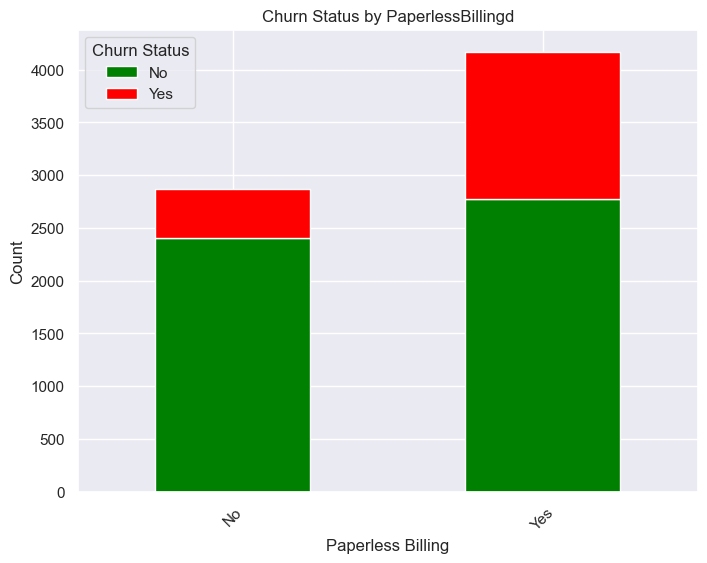

In [34]:
## impact of paperless billing  method on Churn
## creating a cross tabulation of Churn by paperless billing
PaperlessBilling_Churn = pd.crosstab(df['PaperlessBilling'], df['Churn'])

## Plotting stacked bar chart
ax = PaperlessBilling_Churn.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.title('Churn Status by PaperlessBillingd')
plt.xticks(rotation=45)
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

In [35]:
##Encode churn into a binary
df ['Churn_Encoded'] = df ["Churn"].apply(lambda x: 1 if x == 'Yes' else 0)

df [ "Churn_Encoded"].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn_Encoded, dtype: int64

In [36]:
##View full column of Churn encoded

print(df['Churn_Encoded'])

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Encoded, Length: 7043, dtype: int64


In [37]:
## we see that Total charges is our problem because it is object

## convert Total charges into numerical data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

##Drop rows with NaN in the relevant columns
df.dropna(subset=['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn_Encoded'], inplace=True)

print(df[['MonthlyCharges', 'TotalCharges', 'tenure', "Churn_Encoded"]].dtypes)

MonthlyCharges    float64
TotalCharges      float64
tenure              int64
Churn_Encoded       int64
dtype: object


In [38]:
##Checking correlation between Churn and other continous data using Point Biserial correlation

continuous_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
continuous_correlation = {}

for feature in continuous_features:
    correlation, _ = pointbiserialr(df[feature], df['Churn_Encoded'])
    continuous_correlation[feature] = correlation

print(continuous_correlation)

{'MonthlyCharges': 0.19285821847007886, 'TotalCharges': -0.1994840835675642, 'tenure': -0.35404935895325107}


In [39]:
## checking correlation between churn and other categorical variable using Chi squared test

from scipy.stats import chi2_contingency
categorical_features = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Contract", "PaperlessBilling"]

##Dictionary to store results
chi2_results = {}

for feature in categorical_features:
    # Create a contingency table for Churn and the categorical variable
    contingency_table = pd.crosstab(df['Churn'], df[feature])
    
    # Perform the Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store results in the dictionary
    chi2_results[feature] = {'Chi2 Statistic': chi2, 'p-value': p, 'Degrees of Freedom': dof}

# Convert the results into a DataFrame for easier interpretation
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index')

## show results
print(chi2_results_df)

# Interpretation
alpha = 0.05
significant_vars = chi2_results_df[chi2_results_df['p-value'] <= alpha]
print("\nSignificant Variables (p <= 0.05):")
print(significant_vars)

                  Chi2 Statistic        p-value  Degrees of Freedom
gender                  0.475455   4.904885e-01                   1
SeniorCitizen         158.440816   2.479256e-36                   1
Partner               157.503151   3.973798e-36                   1
Dependents            186.321639   2.019659e-42                   1
PhoneService            0.873733   3.499240e-01                   1
MultipleLines          11.271541   3.567927e-03                   2
InternetService       728.695614  5.831199e-159                   2
OnlineSecurity        846.677389  1.400687e-184                   2
OnlineBackup          599.175185  7.776099e-131                   2
DeviceProtection      555.880327  1.959389e-121                   2
TechSupport           824.925564  7.407808e-180                   2
StreamingTV           372.456502   1.324641e-81                   2
StreamingMovies       374.268432   5.353560e-82                   2
Contract             1179.545829  7.326182e-257 

In [40]:
# Function to calculate Cramer's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Example usage on a DataFrame 'df' with categorical variables 'Internet Service' and 'Contract Plan'
categorical_features == ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies","Contract", "PaperlessBilling"]
churn_correlation = {}

for feature in categorical_features:
    churn_correlation[feature] = cramers_v(df[feature], df['Churn'])

# Display correlations
churn_correlation

{'gender': 0.008222711767086818,
 'SeniorCitizen': 0.15010463561752393,
 'Partner': 0.1496598111790044,
 'Dependents': 0.16277669159928557,
 'PhoneService': 0.011146791573280324,
 'MultipleLines': 0.040036141280711854,
 'InternetService': 0.3219093912684771,
 'OnlineSecurity': 0.3469920701082114,
 'OnlineBackup': 0.291902273936468,
 'DeviceProtection': 0.28115850233148504,
 'TechSupport': 0.342505815780552,
 'StreamingTV': 0.23014330684583634,
 'StreamingMovies': 0.23070242924775253,
 'Contract': 0.4095604189089921,
 'PaperlessBilling': 0.19112672191120977}

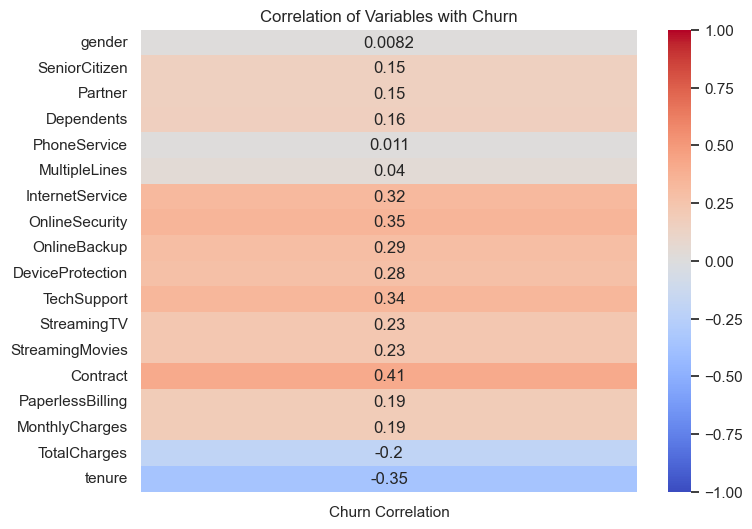

In [41]:
# Combine correlations into a DataFrame for visualization
combined_correlation = {**churn_correlation, **continuous_correlation}
corr_df = pd.DataFrame.from_dict(combined_correlation, orient='index', columns=['Churn Correlation'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation of Variables with Churn')
plt.show()

In [42]:
##Encode all the categorical data using binary encoding 
df ['gender_Encoded'] = df ["gender"].map({'Male': 1, 'Female': 0})
df ['PaperlessBilling_encoded'] = df ["PaperlessBilling"].map({'Yes': 1, 'No': 0})
df ['DeviceProtection_encoded'] = df ["DeviceProtection"].map({'Yes': 1, 'No': 0})

##Encoding multi-category features using One-Hot encoding 
ohe_features = ['PaymentMethod', 'InternetService', 'Contract']
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
ohe_encoded = ohe.fit_transform(df[ohe_features])
ohe_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(ohe_features))

## Merge encoded features
df = pd.concat([df.drop(columns=ohe_features), ohe_df], axis=1)

##Drop rows with NaN in the relevant columns
df.dropna(subset=['gender_Encoded', 'PaperlessBilling_encoded', 'DeviceProtection_encoded', 'Churn_Encoded', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year'], inplace=True)

#View encoded Data frame
print(df)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            0.0     Yes         No     1.0   
1     5575-GNVDE    Male            0.0      No         No    34.0   
2     3668-QPYBK    Male            0.0      No         No     2.0   
3     7795-CFOCW    Male            0.0      No         No    45.0   
4     9237-HQITU  Female            0.0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
7026  8775-CEBBJ  Female            0.0      No         No     9.0   
7027  0550-DCXLH    Male            0.0      No         No    13.0   
7028  9281-CEDRU  Female            0.0     Yes         No    68.0   
7029  2235-DWLJU  Female            1.0      No         No     6.0   
7031  3605-JISKB    Male            1.0     Yes         No    55.0   

     PhoneService     MultipleLines OnlineSecurity OnlineBackup  ...  \
0              No  No phone service             No          Yes  ...   
1             Y

In [43]:
## Split data into x and y vraibles 
x= df.loc[:, ["gender_Encoded", "tenure", "PaperlessBilling_encoded", "DeviceProtection_encoded", "PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check", "InternetService_Fiber optic", "InternetService_No", "Contract_One year", "Contract_Two year","MonthlyCharges", "TotalCharges"]]
x.head()

,gender_Encoded,tenure,PaperlessBilling_encoded,DeviceProtection_encoded,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,MonthlyCharges,TotalCharges
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,29.85,29.85
1,1.0,34.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,56.95,1889.50
2,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,53.85,108.15
3,1.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.30,1840.75
4,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,70.70,151.65


In [44]:
y = df.loc[:,["Churn_Encoded"]]
y.head()

,Churn_Encoded
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0


In [45]:
##Split training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
##fit data into model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\Sphiwe.Masela\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [47]:
## Make predictions 
y_pred = model.predict(x_test)

# Evualuate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Accuracy: 0.7450

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.82      1130
         1.0       0.60      0.56      0.58       521

    accuracy                           0.75      1651
   macro avg       0.70      0.70      0.70      1651
weighted avg       0.74      0.75      0.74      1651


Confusion Matrix:
[[938 192]
 [229 292]]
